## Machine Learning Course Day - 7

### Name - Kattamuri V S J V S Hitesh Gupta
### Roll - CS20B1127

1. Download any Multi Dimensional Classification Dataset from UCI repository.
2. Ignore the class labels and perform Clustering.
3. Experiment with various clustering techniques (Agglomerative , Kmeans...) and number of clusters (3 cluster, 4 clusters, ...)
4. Check and compare the performance with ground truth using Rand Index (RI) and Adjusted Rand Index (RAI) metrics.

1. Download any Multi Dimensional Classification Dataset from UCI Repository.

In [262]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

### Dataset :- Binary classification task on possible configurations of tic-tac-toe game

Attribute Information: (x=player x has taken, o=player o has taken, b=blank)

1. top-left-square : {x,o,b}
2. top-middle-square : {x,o,b}
3. top-right-square : {x,o,b}
4. middle-left-square : {x,o,b}
5. middle-middle-square : {x,o,b}
6. middle-right-square : {x,o,b}
7. bottom-left-square : {x,o,b}
8. bottom-middle-square : {x,o,b}
9. bottom-right-square : {x,o,b}
10. Class : {positive,negative}

In [263]:
# importing the dataset
attribute_list = ['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class']

df = pd.read_csv("tic-tac-toe.data", names=attribute_list)
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [264]:
# checking for null values
df.isnull().sum()

top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
Class                   0
dtype: int64

In [265]:
# encoding the categorical features
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,2,2,0
4,0,0,0,0,0,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
953,1,0,0,0,0,0,1,1,1,1
954,1,0,1,0,2,0,0,0,1,1
955,1,0,1,0,0,2,0,0,1,1
956,1,0,1,1,2,2,0,0,1,1


In [266]:
# shuffle the dataset using sklearn
from sklearn.utils import shuffle
df = shuffle(df, random_state=42)
df = df.reset_index(drop=True)
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,1,1,1,2,2,2,0,0,1,1
1,1,2,2,0,2,2,2,2,0,0
2,1,0,2,0,2,1,1,1,0,0
3,2,0,1,0,2,0,0,0,0,1
4,1,2,0,0,0,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...
953,0,0,2,1,2,0,1,2,1,0
954,0,2,1,2,2,0,1,1,1,0
955,1,2,0,1,2,1,1,2,1,1
956,1,2,0,1,2,0,0,2,1,0


> After encoding, for the first 9 attributes, 0 means x, 1 means o and 2 means b.
> where, x = player x has taken, o = player o has taken, b = blank 

>For the class column, 0 means positive and 1 means negative.
>where, positive = wins for player x, negative = wins for player o

2. Ignore the class label and perform clustering.

In [267]:
# removing the class label from the dataset.
X = df.iloc[:,:-1].astype('int')
X

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,1,1,1,2,2,2,0,0,1
1,1,2,2,0,2,2,2,2,0
2,1,0,2,0,2,1,1,1,0
3,2,0,1,0,2,0,0,0,0
4,1,2,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...
953,0,0,2,1,2,0,1,2,1
954,0,2,1,2,2,0,1,1,1
955,1,2,0,1,2,1,1,2,1
956,1,2,0,1,2,0,0,2,1


In [268]:
# storing the class label from the dataset.
y = df.iloc[:,-1].astype('int')
y

0      1
1      0
2      0
3      1
4      1
      ..
953    0
954    0
955    1
956    0
957    0
Name: Class, Length: 958, dtype: int32

3. Experiment with various clustering techniques (Agglomerative , Kmeans...) and number of clusters (3 cluster, 4 clusters, ...)

In [269]:
# performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [270]:
# performing Agglomerative Clustering for 2 clusters
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_train)

# predicting the class labels
y_pred_agg_2 = agg.fit_predict(X_test)

# checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_agg_2)

0.8125

In [271]:
# performing Agglomerative Clustering for 3 clusters
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_train, y_train)

# predicting the test set results
y_pred_agg_3 = agg.fit_predict(X_test)

# checking the accuracy
accuracy_score(y_test, y_pred_agg_3)

0.6666666666666666

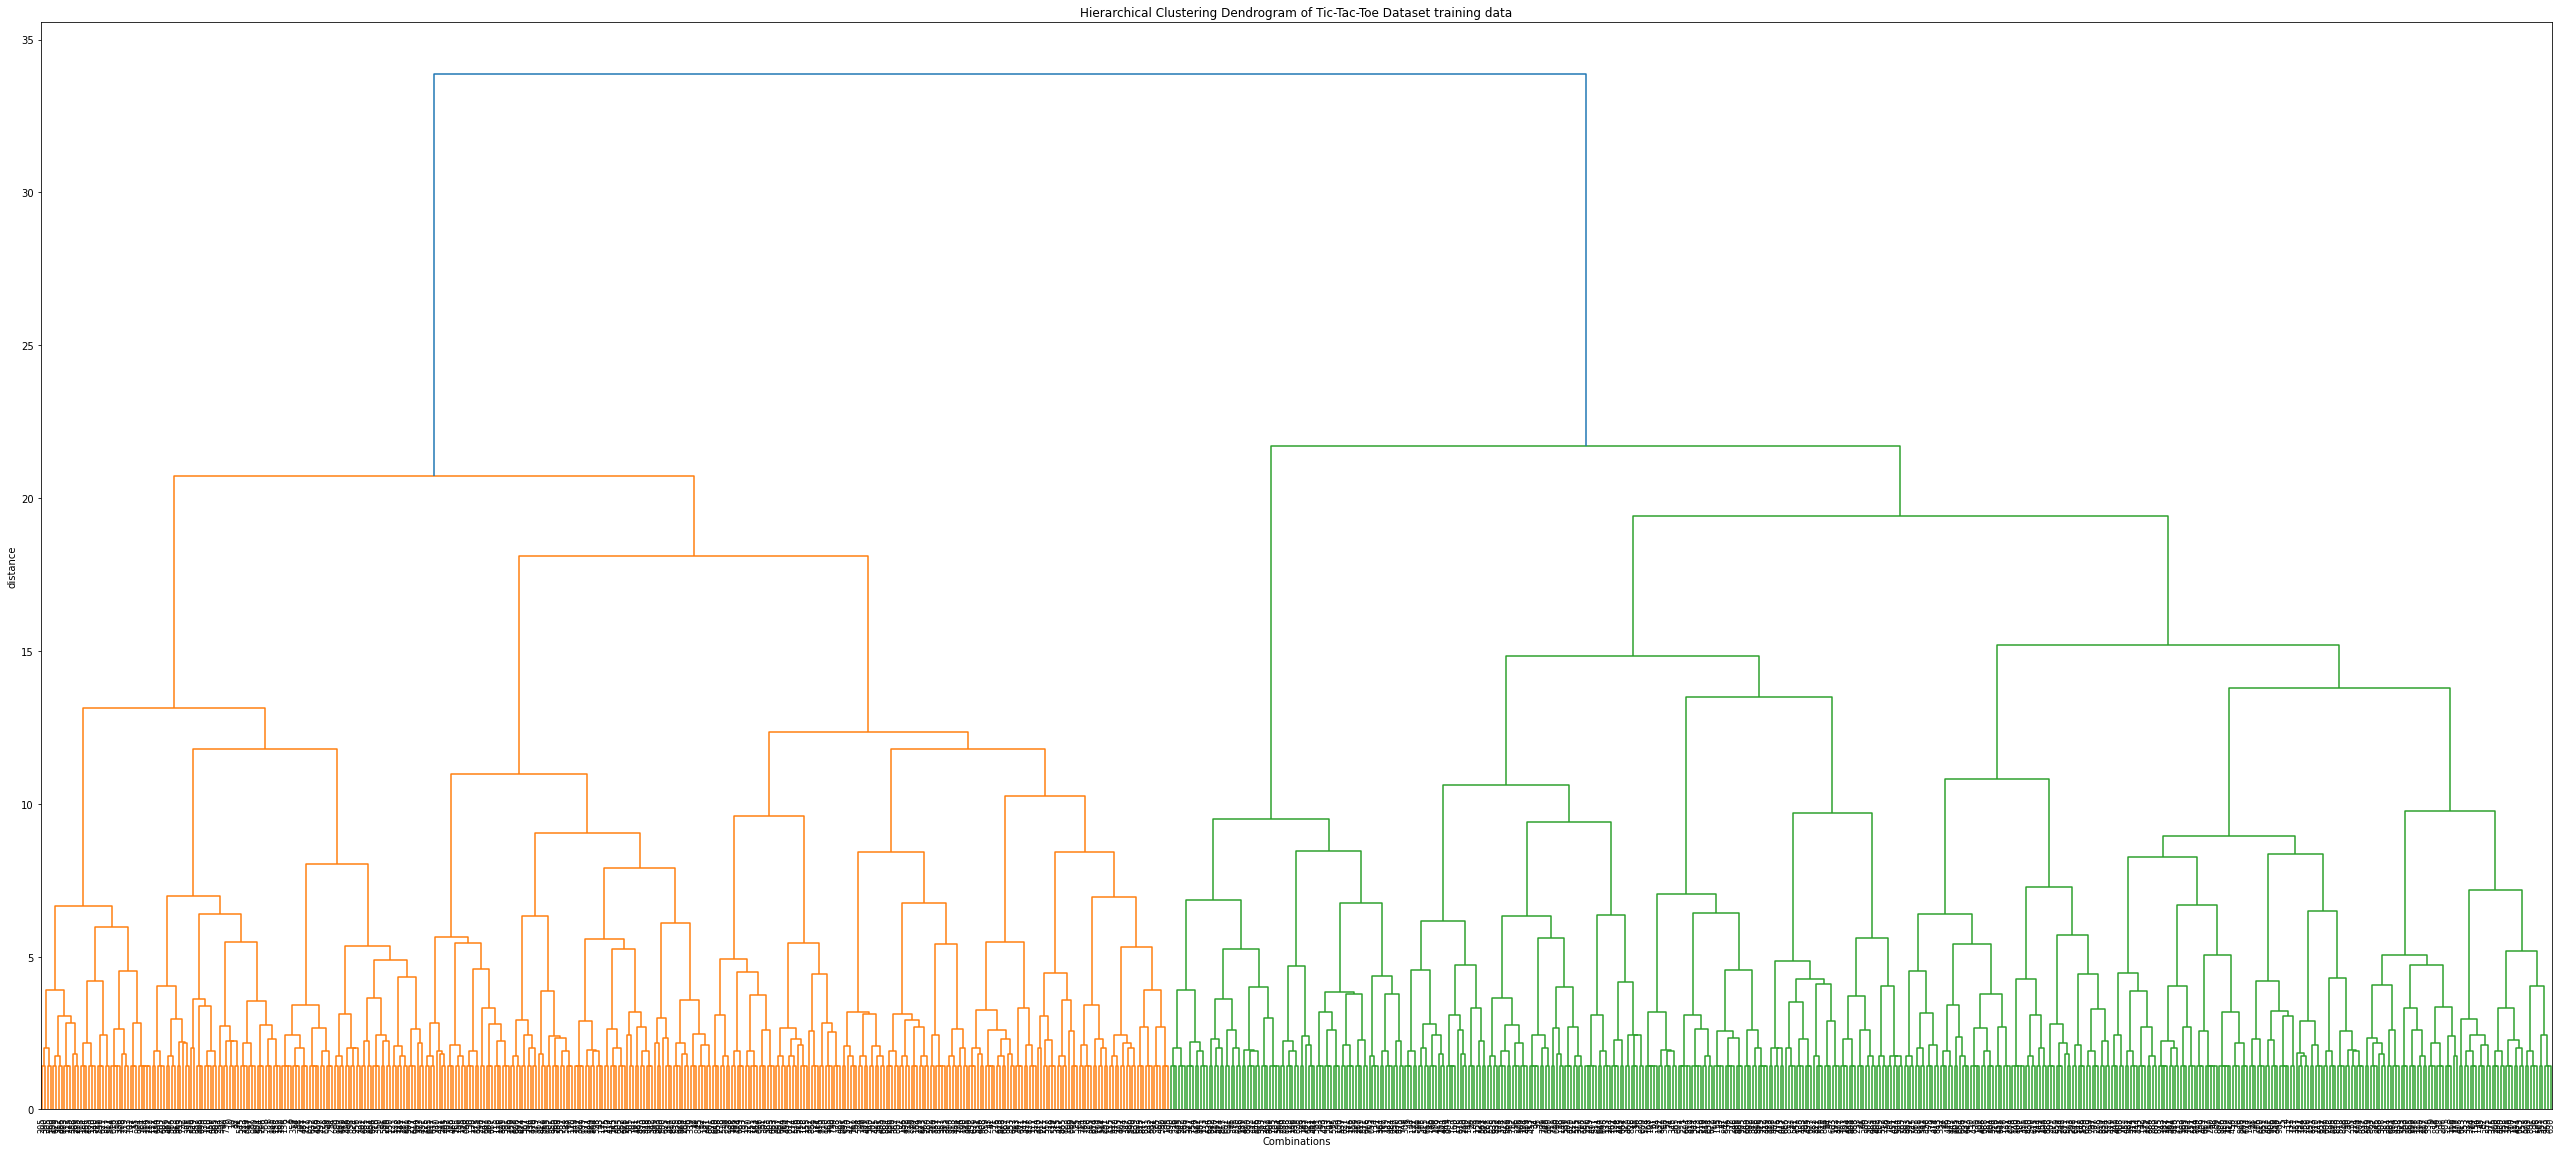

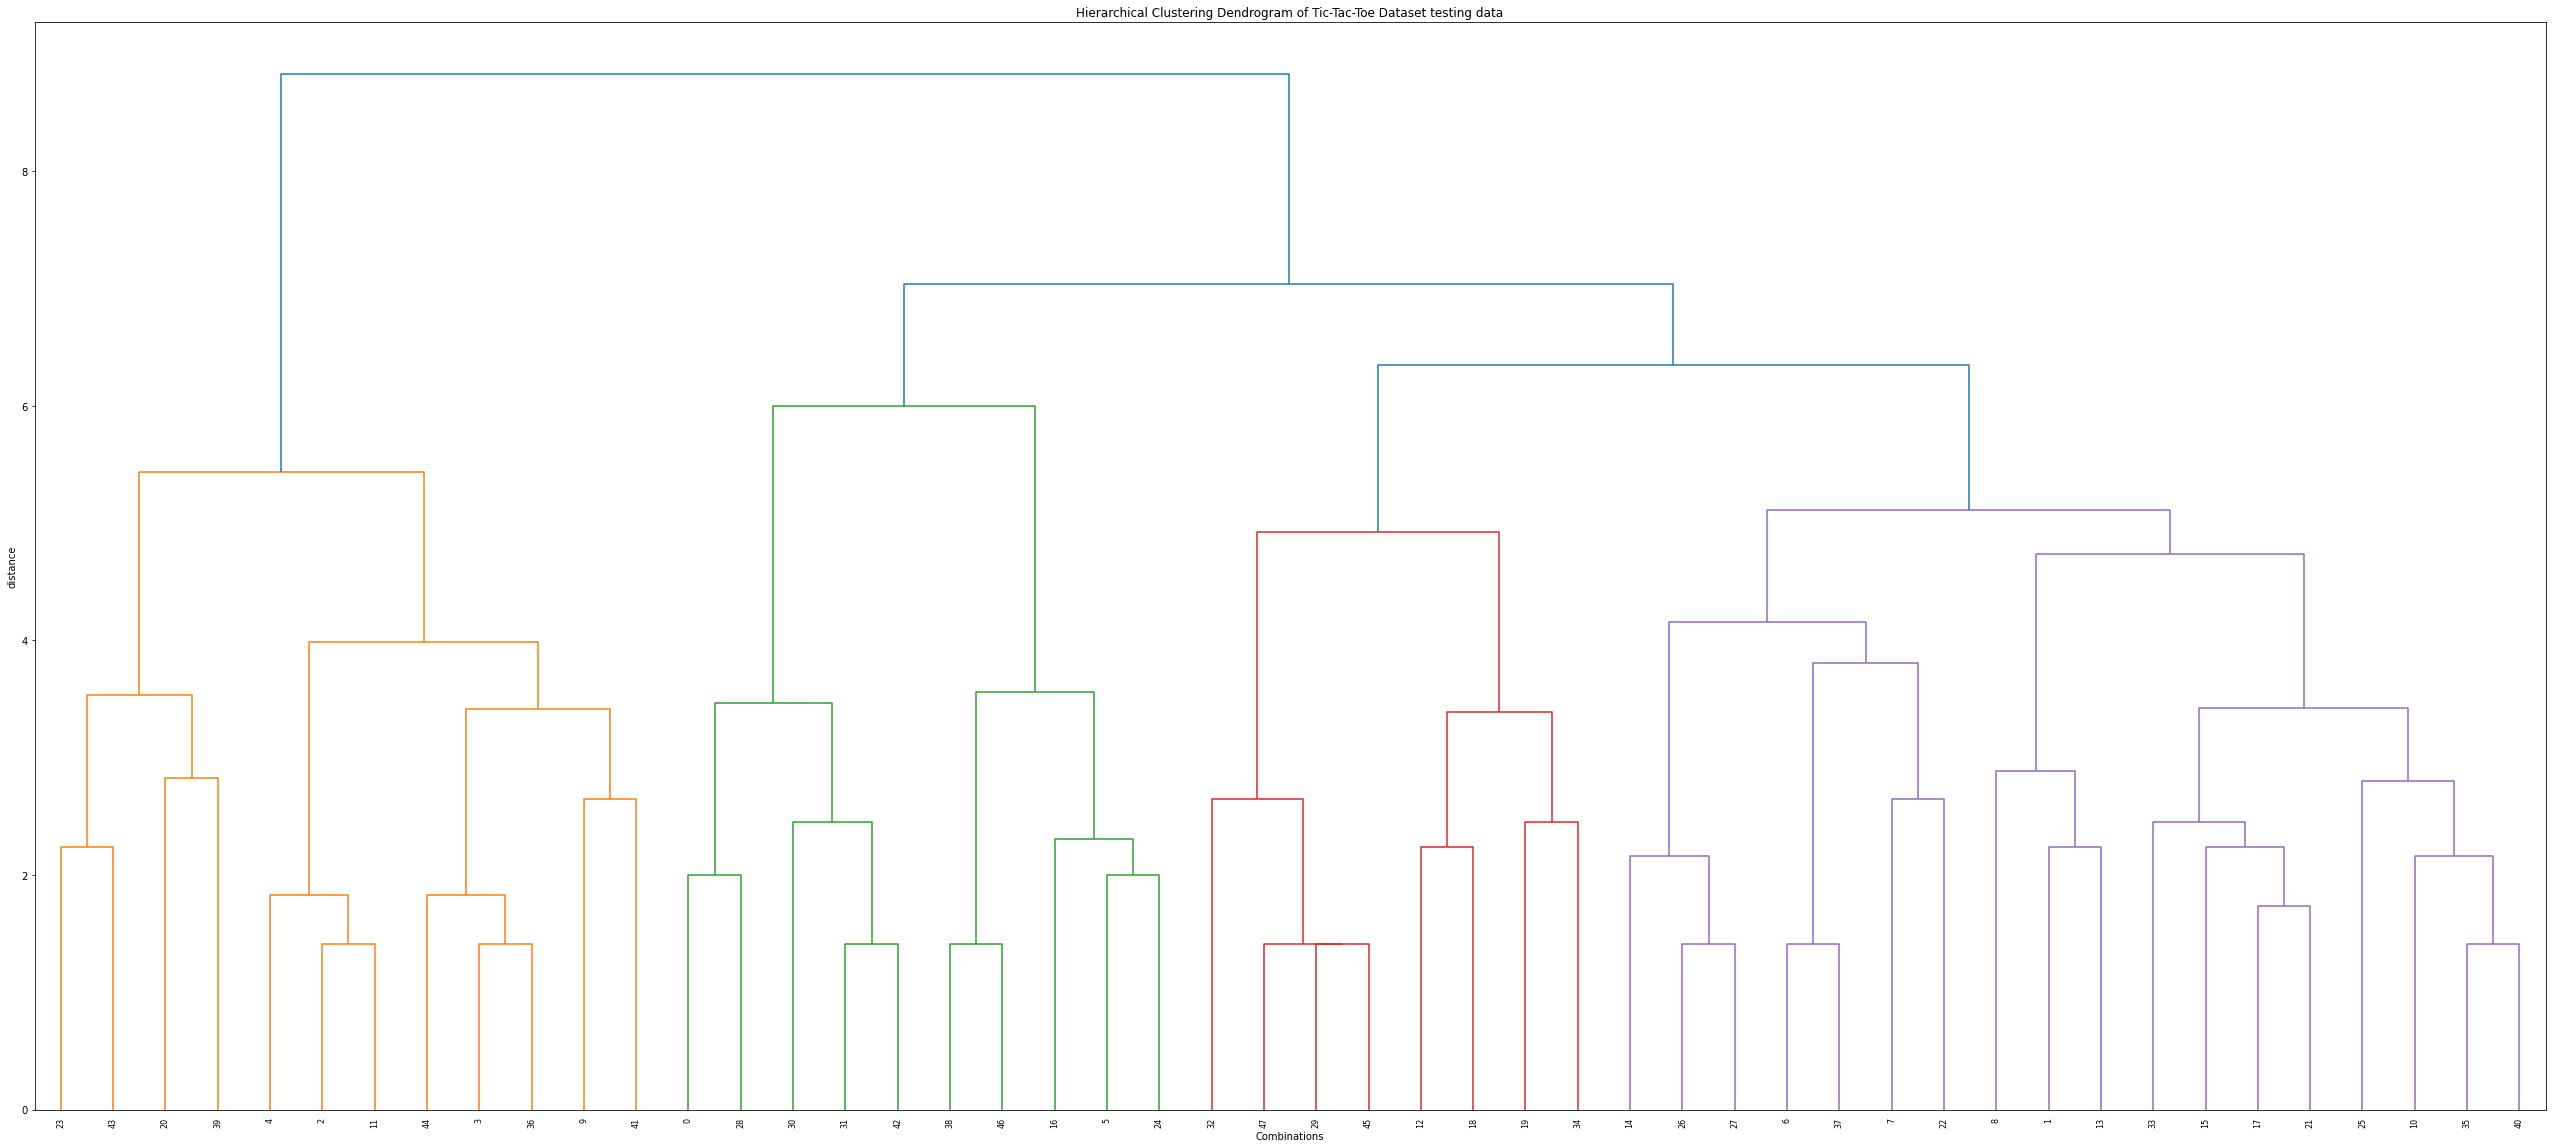

In [272]:
# performing Agglomerative Clustering for 4 clusters
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_train, y_train)

# predicting the test set results
y_pred_agg_4 = agg.fit_predict(X_test)

# checking the accuracy
accuracy_score(y_test, y_pred_agg_4)

# # plotting the dendrogram
# plotting the dendrogram 
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_train, 'ward')
plt.figure(figsize=(45, 20))
plt.title('Hierarchical Clustering Dendrogram of Tic-Tac-Toe Dataset training data')
plt.xlabel('Combinations')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

Z = linkage(X_test, 'ward')
plt.figure(figsize=(45, 20))
plt.title('Hierarchical Clustering Dendrogram of Tic-Tac-Toe Dataset testing data')
plt.xlabel('Combinations')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

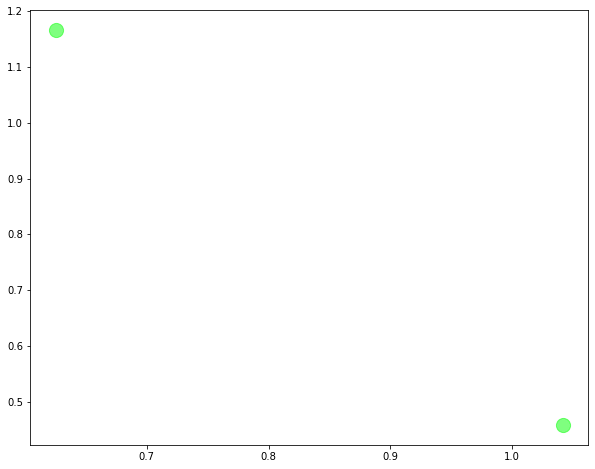

In [273]:
# performing K-Means Clustering for 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train, y_train)

# predicting the test set results
y_pred_kmeans_2 = kmeans.fit_predict(X_test)

# checking the accuracy
accuracy_score(y_test, y_pred_kmeans_2)

# plot the cluster centers and cluster assignments
plt.figure(figsize=(10, 8))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='lime', s=200, alpha=0.5)
plt.show()

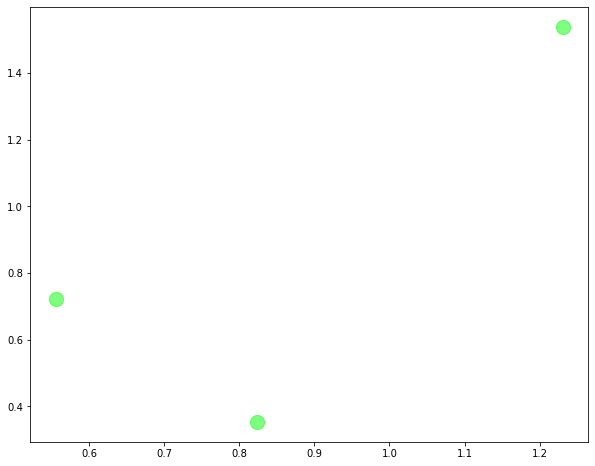

In [274]:
# performing K-Means Clustering for 3 clusters
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_train, y_train)

# predicting the test set results
y_pred_kme_3 = kmeans.fit_predict(X_test)

# checking the accuracy
accuracy_score(y_test, y_pred_kme_3)

# plot the cluster centers and cluster assignments
plt.figure(figsize=(10, 8))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='lime', s=200, alpha=0.5)
plt.show()

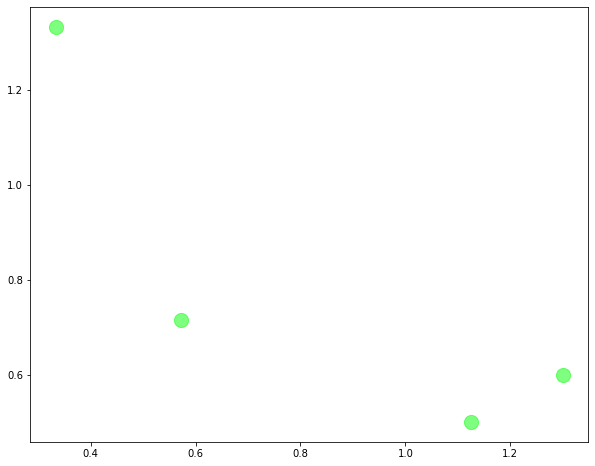

In [275]:
# performing K-Means Clustering for 4 clusters
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X_train, y_train)

# predicting the test set results
y_pred_kme_4 = kmeans.fit_predict(X_test)

# checking the accuracy
accuracy_score(y_test, y_pred_kme_4)

# plot the cluster centers and cluster assignments
plt.figure(figsize=(10, 8))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='lime', s=200, alpha=0.5)
plt.show()

4. Check and compare the performance with ground truth using Rand Index (RI) and Adjusted Rand Index (RAI) metrics.

In [276]:
# comparing performance of Agglomerative CLustering using Rand Index and Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score, rand_score
print("Rand Index for 2 clusters: ", rand_score(y_test, y_pred_agg_2))
print("Adjusted Rand Index for 2 clusters: ", adjusted_rand_score(y_test, y_pred_agg_2))
print("Rand Index for 3 clusters: ", rand_score(y_test, y_pred_agg_3))
print("Adjusted Rand Index for 3 clusters: ", adjusted_rand_score(y_test, y_pred_agg_3))
print("Rand Index for 4 clusters: ", rand_score(y_test, y_pred_agg_4))
print("Adjusted Rand Index for 4 clusters: ", adjusted_rand_score(y_test, y_pred_agg_4))

# comparing performance of K-means Clustering using Rand Index and Adjusted Rand Index
print("\nRand Index for 2 clusters: ", rand_score(y_test, y_pred_kmeans_2))
print("Adjusted Rand Index for 2 clusters: ", adjusted_rand_score(y_test, y_pred_kmeans_2))
print("Rand Index for 3 clusters: ", rand_score(y_test, y_pred_kme_3))
print("Adjusted Rand Index for 3 clusters: ", adjusted_rand_score(y_test, y_pred_kme_3))
print("Rand Index for 4 clusters: ", rand_score(y_test, y_pred_kme_4))
print("Adjusted Rand Index for 4 clusters: ", adjusted_rand_score(y_test, y_pred_kme_4))

Rand Index for 2 clusters:  0.6888297872340425
Adjusted Rand Index for 2 clusters:  0.37843336724313326
Rand Index for 3 clusters:  0.6391843971631206
Adjusted Rand Index for 3 clusters:  0.277496600694969
Rand Index for 4 clusters:  0.6037234042553191
Adjusted Rand Index for 4 clusters:  0.20540847201210288

Rand Index for 2 clusters:  0.5328014184397163
Adjusted Rand Index for 2 clusters:  0.06549707602339182
Rand Index for 3 clusters:  0.5425531914893617
Adjusted Rand Index for 3 clusters:  0.08340341096990599
Rand Index for 4 clusters:  0.549645390070922
Adjusted Rand Index for 4 clusters:  0.09696574286821925
